# Bank Note Authentication-- Docker Implementation

### This notebook is mailny focused on the implementaion of docker and deploying the machine learning model in a good way.

Data were extracted from images that weretaken from genuine and forged banknote-like specimen. For Digitization, an industrial camera usually used for print inspection was used. The final images have 400x,400 pixels.Due to the object lens and distance to the INvestigated object gray-scale pictures with a resolution of about 660dpi were gained. Wavelet Transform tool were used to extract features from images. The particular data is from the UCI repository but it was also available on kaggle.  

In [1]:
#data is present in the data section of this repository folder.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("D:/Data_Science/Implementation(Practices)/Bank Note Authentication/Data/BankNote_Authentication.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


If the class of the note is 0,it is not authentic and if the class is 1 it is authentic.

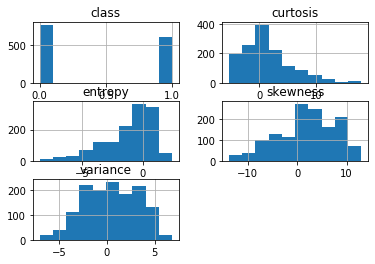

In [4]:
data.hist();

In [5]:
#separating independent and dependent features 
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [6]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [7]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [8]:
## implementing random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#predicting the values
y_pred=model.predict(X_test)

In [10]:
##checking the accuracy
from sklearn.metrics import accuracy_score

score=accuracy_score(y_test,y_pred)

In [11]:
score

0.9878640776699029

In [12]:
import pickle
f1=open('model.pkl','wb')
pickle.dump(model,f1)
f1.close()